In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9

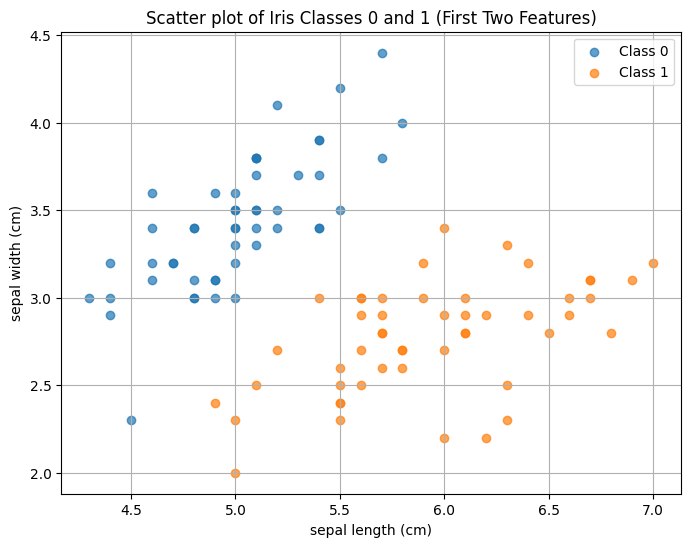

In [ ]:
import matplotlib.pyplot as plt

# Filter data for targets 0 and 1 (assuming iris.target has been preprocessed)
X_0 = iris.data[iris.target == 0]
X_1 = iris.data[iris.target == 1]

# Plot scatterplots
plt.figure(figsize=(8, 6))
plt.scatter(X_0[:, 0], X_0[:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_1[:, 0], X_1[:, 1], label='Class 1', alpha=0.7)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter plot of Iris Classes 0 and 1 (First Two Features)')
plt.legend()
plt.grid(True)
plt.show()

SVM Classifier Accuracy (C=200): 1.00


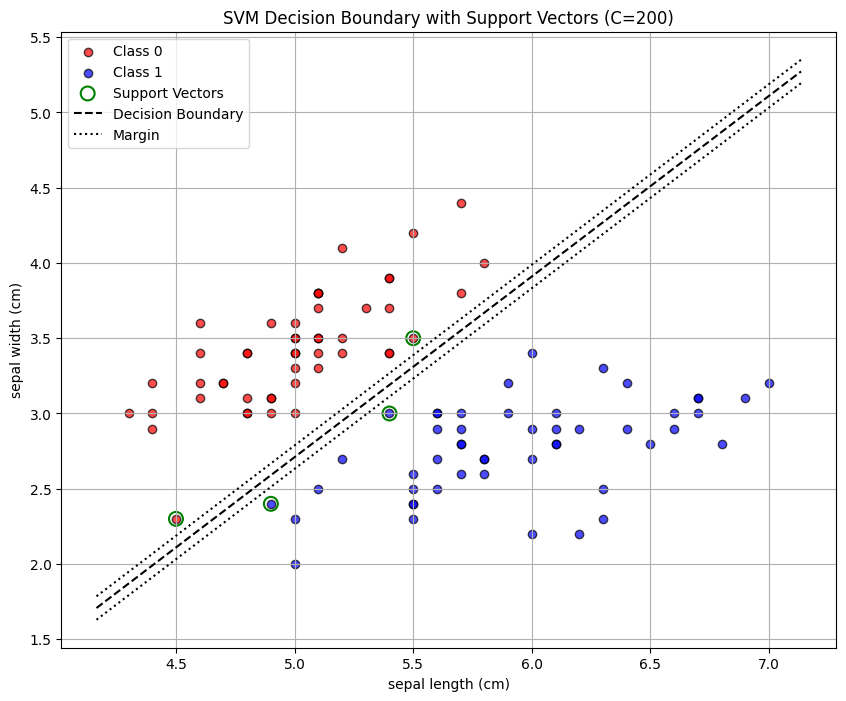

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

# Re-load and preprocess the iris data to ensure 2 features and 2 classes
iris = load_iris()
iris.data = iris.data[:, :2] # Choose only first two features
iris.feature_names = iris.feature_names[:2]

mask = iris.target != 2 # Eliminate iris.target = 2
X = iris.data[mask]
y = iris.target[mask]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier with C=200 (as requested in previous turn)
svm_model_C200 = SVC(kernel='linear', C=1000)
svm_model_C200.fit(X_train, y_train)

# Evaluate the model
score_C200 = svm_model_C200.score(X_test, y_test)
print(f"SVM Classifier Accuracy (C=200): {score_C200:.2f}")

# Get support vectors
support_vectors = svm_model_C200.support_vectors_

# Get weights and bias for the decision boundary
w = svm_model_C200.coef_[0]     # Coefficients
b = svm_model_C200.intercept_[0] # Intercept

# Plotting
plt.figure(figsize=(10, 8))

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.7, c='red', edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.7, c='blue', edgecolors='k')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            facecolors='none', edgecolors='green', linewidth=1.5, label='Support Vectors')


ax = plt.gca()
x_min, x_max = ax.get_xlim()
x_values = np.linspace(x_min, x_max, 100)
y_values = (-w[0] * x_values - b) / w[1]
plt.plot(x_values, y_values, 'k--', label='Decision Boundary')

margin = 1 / np.sqrt(np.dot(w, w))
y_values_plus = ((-w[0] * x_values - b) / w[1]) + margin / np.sqrt(1 + (w[0]/w[1])**2)
y_values_minus = ((-w[0] * x_values - b) / w[1]) - margin / np.sqrt(1 + (w[0]/w[1])**2)
plt.plot(x_values, y_values_plus, 'k:', label='Margin')
plt.plot(x_values, y_values_minus, 'k:')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundary with Support Vectors (C=200)')
plt.legend()
plt.grid(True)
plt.show()